In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data=pd.read_csv("/apple_products.csv")
print(data.head())


                               Product Name  \
0         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2      APPLE iPhone 8 Plus (Silver, 256 GB)   
3           APPLE iPhone 8 (Silver, 256 GB)   
4             APPLE iPhone 8 (Gold, 256 GB)   

                                         Product URL  Brand  Sale Price  \
0  https://www.flipkart.com/apple-iphone-8-plus-g...  Apple       49900   
1  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
2  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
3  https://www.flipkart.com/apple-iphone-8-silver...  Apple       77000   
4  https://www.flipkart.com/apple-iphone-8-gold-2...  Apple       77000   

     Mrp  Discount Percentage  Number Of Ratings  Number Of Reviews  \
0  49900                    0               3431                356   
1  84900                    0               3431                356   
2  84900                    0               3431     

In [ ]:
#To check whether this dataset contains any nulls ow not
print(data.isnull().sum())

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64


In [ ]:
print(data.describe())


          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097   88058.064516             9.951613       22420.403226   
std     34310.446132   34728.825597             7.608079       33768.589550   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     49900.000000   54900.000000             6.000000         740.000000   
50%     75900.000000   79900.000000            10.000000        2101.000000   
75%    117100.000000  120950.000000            14.000000       43470.000000   
max    140900.000000  149900.000000            29.000000       95909.000000   

       Number Of Reviews  Star Rating  
count          62.000000    62.000000  
mean         1861.677419     4.575806  
std          2855.883830     0.059190  
min            42.000000     4.500000  
25%            64.000000     4.500000  
50%           180.000000     4.600000  
75%     

In [ ]:
highest_rated = data.sort_values(by=["Star Rating"],
                                 ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated['Product Name'])

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object


In [ ]:
iphones = highest_rated["Product Name"].value_counts()
label = iphones.index
counts = highest_rated["Number Of Ratings"]
figure = px.bar(highest_rated, x=label,
                y = counts,
            title="Number of Ratings of Highest Rated iPhones")
figure.show()

In [ ]:
iphones = highest_rated["Product Name"].value_counts()
label = iphones.index
counts = highest_rated["Number Of Reviews"]
figure = px.bar(highest_rated, x=label,
                y = counts,
            title="Number of Reviews of Highest Rated iPhones")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="Number Of Ratings",
                    y="Sale Price", size="Discount Percentage",
                    trendline="ols",
                    title="Relationship between Sale Price and Number of Ratings of iPhones")
figure.show()


There is a negative linear relationship between the sale price of iPhones and the number of ratings. It means iPhones with lower sale prices are sold more in India.

In [ ]:
figure = px.scatter(data_frame = data, x="Number Of Ratings",
                    y="Discount Percentage", size="Sale Price",
                    trendline="ols",
                    title="Relationship between Discount Percentage and Number of Ratings of iPhones")
figure.show()

There is a linear relationship between the discount percentage on iPhones on Flipkart and the number of ratings. It means iPhones with high discounts are sold more in India.

**PROBLEM SATETEMENT**


1 what kind of iPhones are liked the most in India:

2number of ratings of the highest-rated iPhones on Flipkart:

3 number of reviews of the highest-rated iPhones on Flipkart:

4relationship between the sale price of iPhones and their ratings on Flipkart:

5 relationship between the discount percentage on iPhones on Flipkart and the number of ratings:



PREDICTIVE ANALYSIS


In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
apple_sales_data = pd.read_csv("/content/apple_products.csv")

# Clean data (convert RAM, create new features)
apple_sales_data['Ram'] = apple_sales_data['Ram'].str.replace(' GB', '').astype(int)
apple_sales_data['Price Difference'] = apple_sales_data['Mrp'] - apple_sales_data['Sale Price']

# Define features and target
X = apple_sales_data[['Mrp', 'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Star Rating', 'Ram', 'Price Difference']]
y = apple_sales_data['Sale Price']


In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# Fit the models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_forest = random_forest.predict(X_test)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Output results
print(f'Linear Regression: MSE = {mse_linear}, R² = {r2_linear}')
print(f'Decision Tree: MSE = {mse_tree}, R² = {r2_tree}')
print(f'Random Forest: MSE = {mse_forest}, R² = {r2_forest}')


Linear Regression: MSE = 1.0679538000838474e-21, R² = 1.0
Decision Tree: MSE = 0.0, R² = 1.0
Random Forest: MSE = 6754059.263076925, R² = 0.9955867689017223


In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:

# Load the data
df = pd.read_csv('apple_products.csv')

In [13]:

# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB
None
          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097  

In [15]:

# Convert 'Sale Price' and 'Mrp' to numeric, removing the comma
# Convert 'Sale Price' and 'Mrp' to numeric, removing the comma
df['Sale Price'] = df['Sale Price'].astype(str).str.replace(',', '').astype(float) # Changed to convert to string first
df['Mrp'] = df['Mrp'].astype(str).str.replace(',', '').astype(float) # Changed to convert to string first

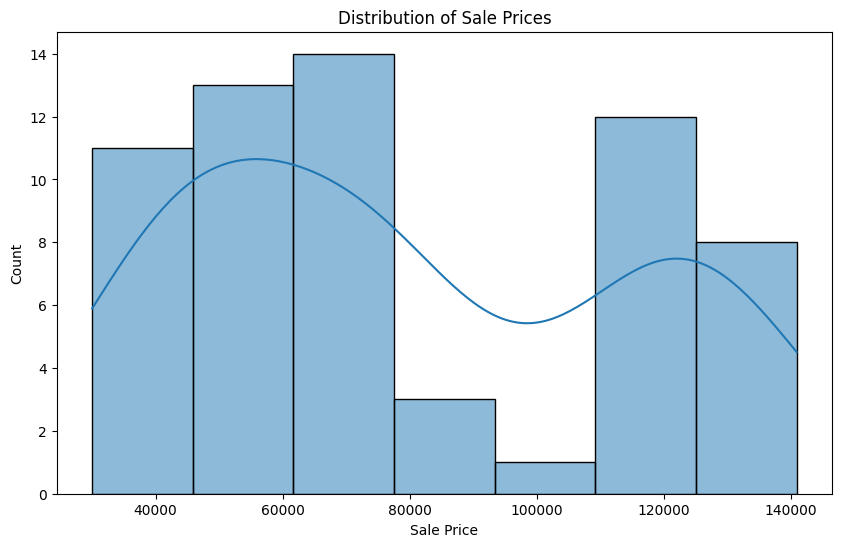

In [18]:

# Visualization 1: Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Sale Price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

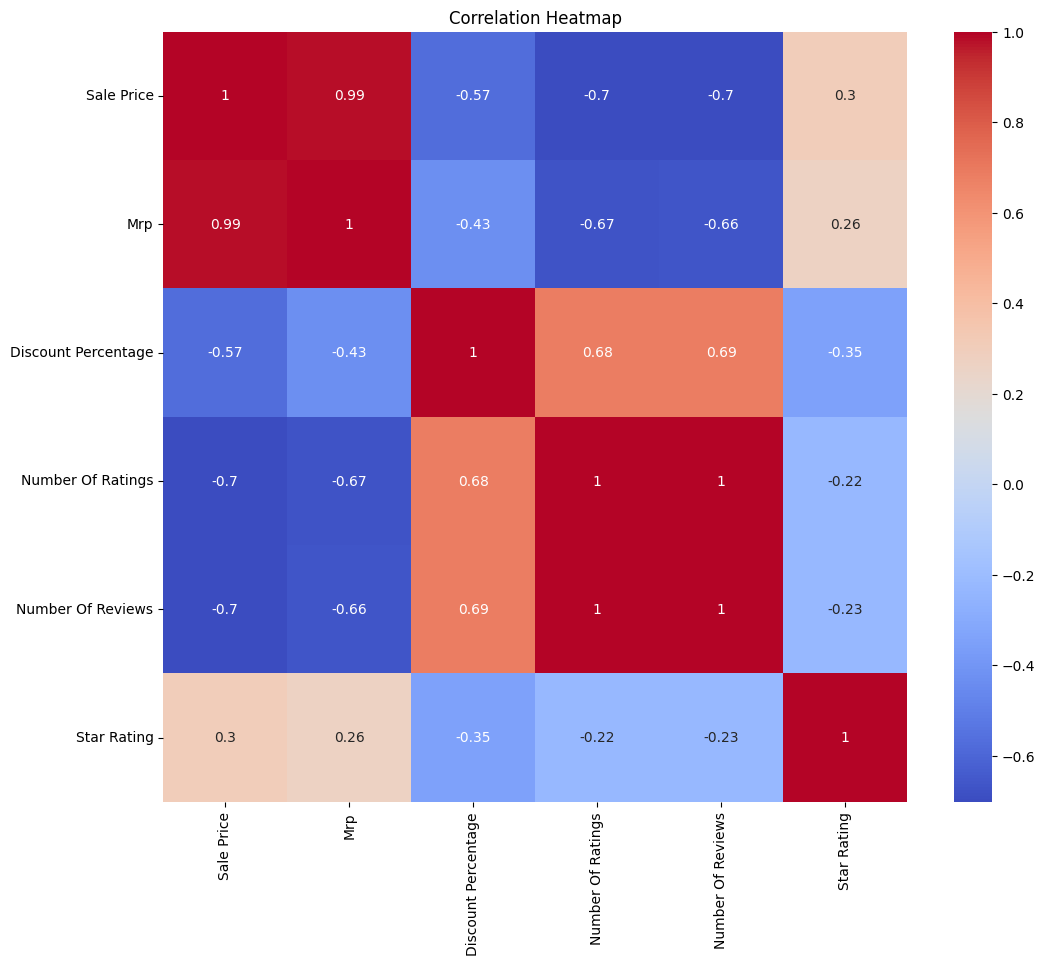

In [19]:

# Visualization 2: Correlation Heatmap
numeric_columns = ['Sale Price', 'Mrp', 'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Star Rating']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


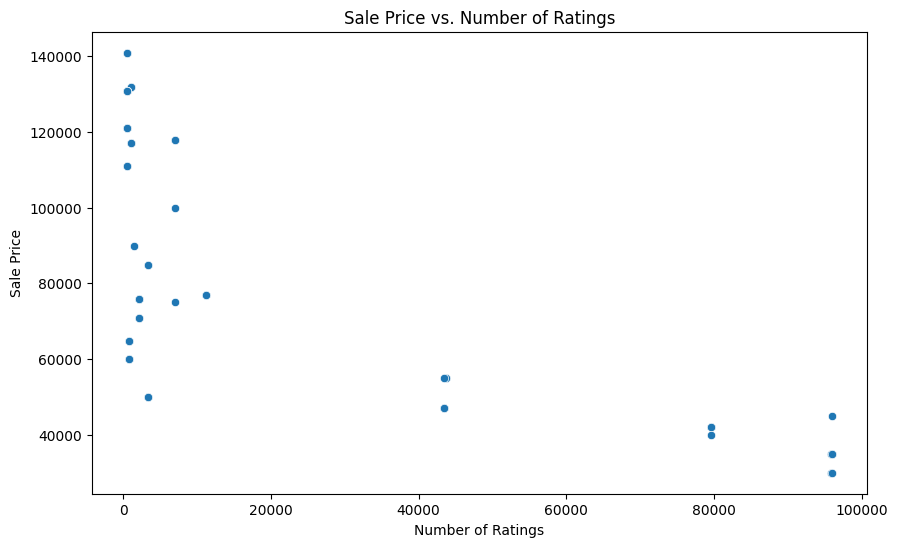

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number Of Ratings', y='Sale Price', data=df)
plt.title('Sale Price vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Sale Price')
plt.show()

In [22]:
#Predictive Analysis: Linear Regression to predict Sale Price based on other features
features = ['Mrp', 'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Star Rating']
X = df[features]
y = df['Sale Price']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 4613183.130744397
R-squared Score: 0.9969856581854485


In [24]:

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': model.coef_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
               feature  importance
3    Number Of Reviews    5.308065
0                  Mrp    0.914734
2    Number Of Ratings   -0.380953
4          Star Rating -722.860319
1  Discount Percentage -989.709629


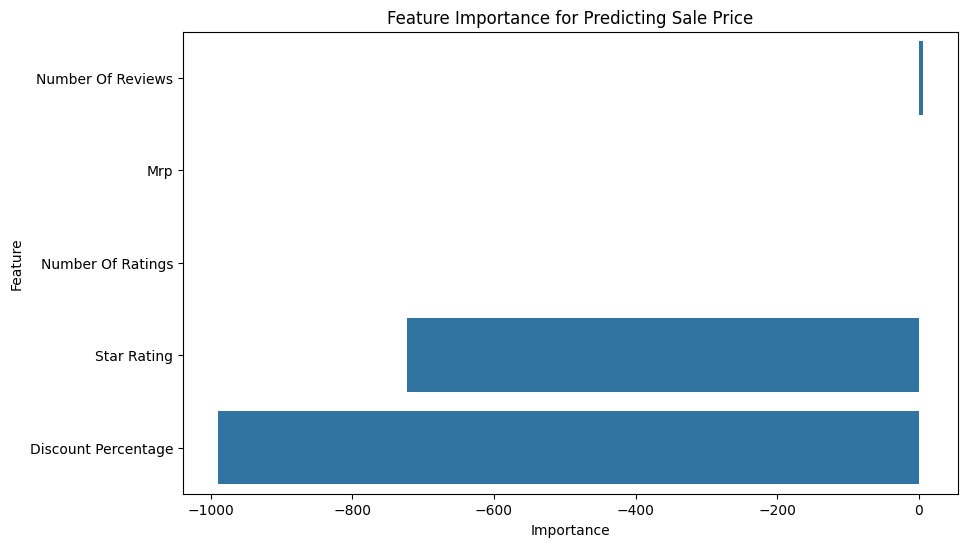

In [25]:

# Visualization 4: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Predicting Sale Price')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [26]:

# Additional EDA insights
print("Top 5 most expensive products:")
print(df.nlargest(5, 'Sale Price')[['Product Name', 'Sale Price']])

print("\nTop 5 products with highest discount:")
print(df.nlargest(5, 'Discount Percentage')[['Product Name', 'Discount Percentage']])

print("\nAverage Star Rating by RAM:")
print(df.groupby('Ram')['Star Rating'].mean().sort_values(ascending=False))


Top 5 most expensive products:
                                        Product Name  Sale Price
24              APPLE iPhone 12 Pro (Silver, 512 GB)    140900.0
41        APPLE iPhone 12 Pro (Pacific Blue, 512 GB)    140900.0
14            APPLE iPhone 11 Pro Max (Gold, 256 GB)    131900.0
16  APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)    131900.0
25    APPLE iPhone 12 Pro Max (Pacific Blue, 256 GB)    130900.0

Top 5 products with highest discount:
                                   Product Name  Discount Percentage
18  APPLE iPhone 11 Pro (Midnight Green, 64 GB)                   29
52               APPLE iPhone SE (White, 64 GB)                   24
57               APPLE iPhone SE (Black, 64 GB)                   24
53              APPLE iPhone SE (Black, 128 GB)                   22
54              APPLE iPhone SE (White, 128 GB)                   22

Average Star Rating by RAM:
Ram
3 GB    4.600000
4 GB    4.589655
6 GB    4.578947
2 GB    4.538462
Name: Star Rating, dtype:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


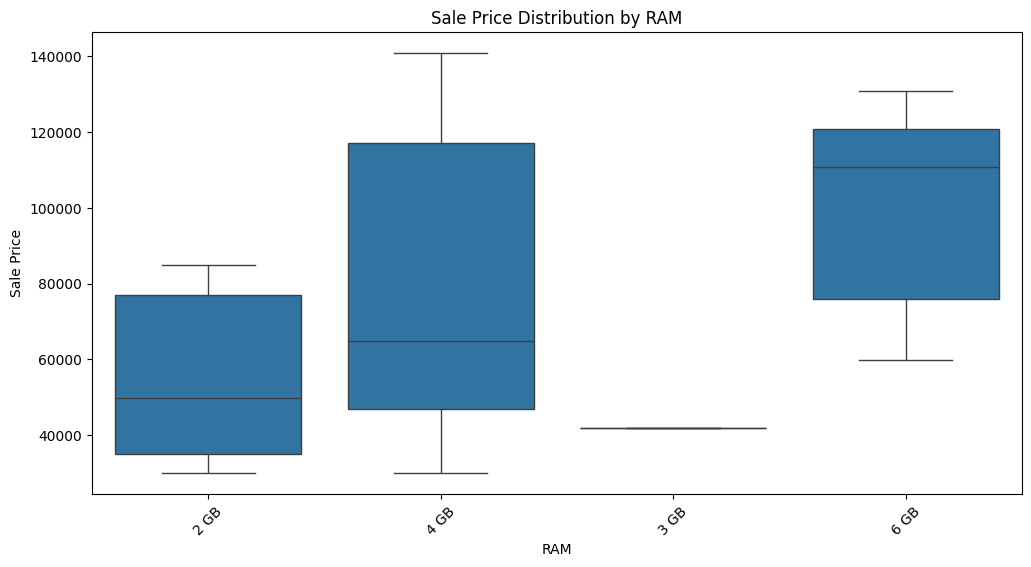

In [27]:

# Visualization 5: Box plot of Sale Price by RAM
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ram', y='Sale Price', data=df)
plt.title('Sale Price Distribution by RAM')
plt.xlabel('RAM')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()